# Financial Data Visualizer

Getting all the dependencies ready, it may take 15 seconds

In [1]:
import sys
!{sys.executable} -m pip install matplotlib >/dev/null 2>&1

import matplotlib.pyplot as plt
import urllib.request
import json
import ssl
context = ssl._create_unverified_context()
from matplotlib.pyplot import figure

print("dependencies ready")

dependencies ready


### Monetary Base

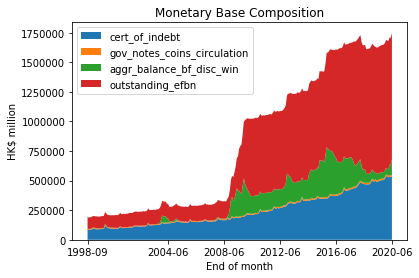

In [2]:
def get_MBC_from_HKMA():
    # Monetary Base Data released by hkma monthly
    url = 'https://api.hkma.gov.hk/public/market-data-and-statistics/monthly-statistical-bulletin/monetary-operation/monetary-base-endperiod?choose=end_of_month&from=1998-09&to=now&sortby=end_of_month&sortorder=asc'

    # retrieve data from hkma api, 100 entries per call, untill every data are retrieveed
    records = []
    offset = 0
    while True:
        with urllib.request.urlopen(url+"&offset="+str(offset), context=context) as req:
            data = json.loads(req.read().decode())
            records += data['result']['records']
        if data['result']['datasize'] <= 0:
            break
        else:
            offset += 100

    # now data retrieved from hkma are stored in 'records' in a chronological order
    return records


def MBC():
    records = get_MBC_from_HKMA()

    # prepare formattedX and formattedY to plot a stacked area graph
    formattedX = []
    formatted_cert_of_indebt = []
    formatted_gov_notes_coins_circulation = []
    formatted_aggr_balance_bf_disc_win = []
    formatted_outstanding_efbn = []
    formattedY = []

    for record in records:
        formattedX += [record['end_of_month']]
        # cert_of_indebt
        formatted_cert_of_indebt += [record['cert_of_indebt']]
        # gov_notes_coins_circulation
        formatted_gov_notes_coins_circulation += [
            record['gov_notes_coins_circulation']]
        # aggr_balance_bf_disc_win
        formatted_aggr_balance_bf_disc_win += [
            record['aggr_balance_bf_disc_win']]
        # outstanding_efbn
        formatted_outstanding_efbn += [record['outstanding_efbn']]

    formattedY = [formatted_cert_of_indebt,
                  formatted_gov_notes_coins_circulation,
                  formatted_aggr_balance_bf_disc_win,
                  formatted_outstanding_efbn]

    # Plot mbc
    plt.stackplot(
        formattedX,
        formattedY,
        labels=['cert_of_indebt',
                'gov_notes_coins_circulation',
                'aggr_balance_bf_disc_win',
                'outstanding_efbn']
    )
    plt.title("Monetary Base Composition")
    plt.xlabel("End of month")
    plt.ylabel("HK$ million")
    plt.xticks([formattedX[-1], '2016-06', '2012-06',
                '2008-06', '2004-06', '1998-09'])
    plt.legend(loc='upper left')
    plt.rcParams['figure.figsize'] = [20, 10]
    plt.show()


MBC()

### 1. Money Multiplier = M3 / MB (HKD)

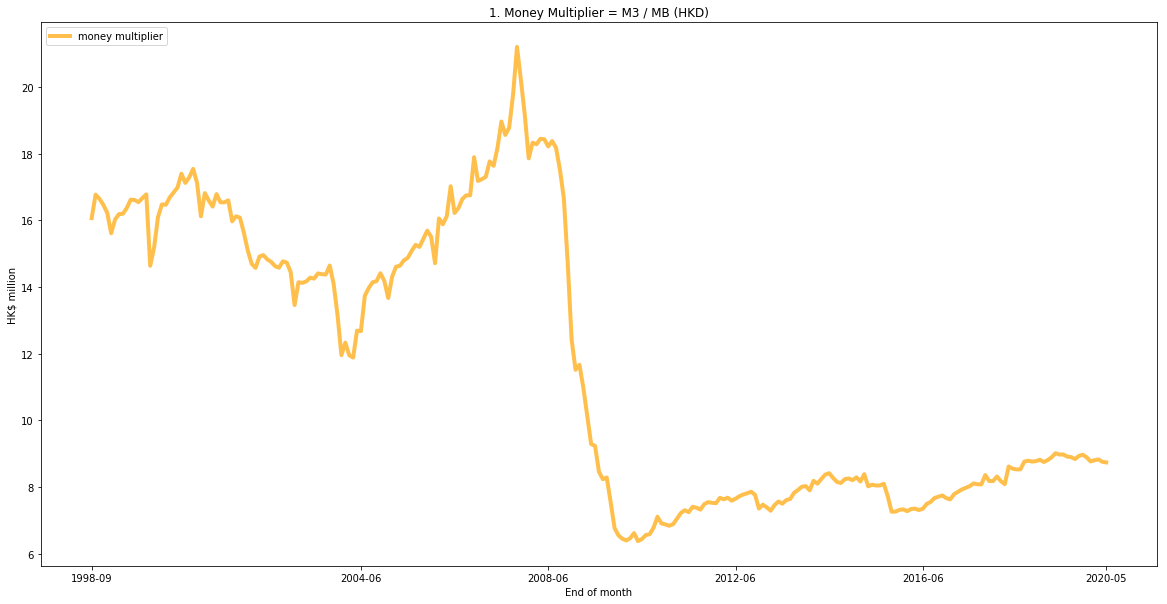

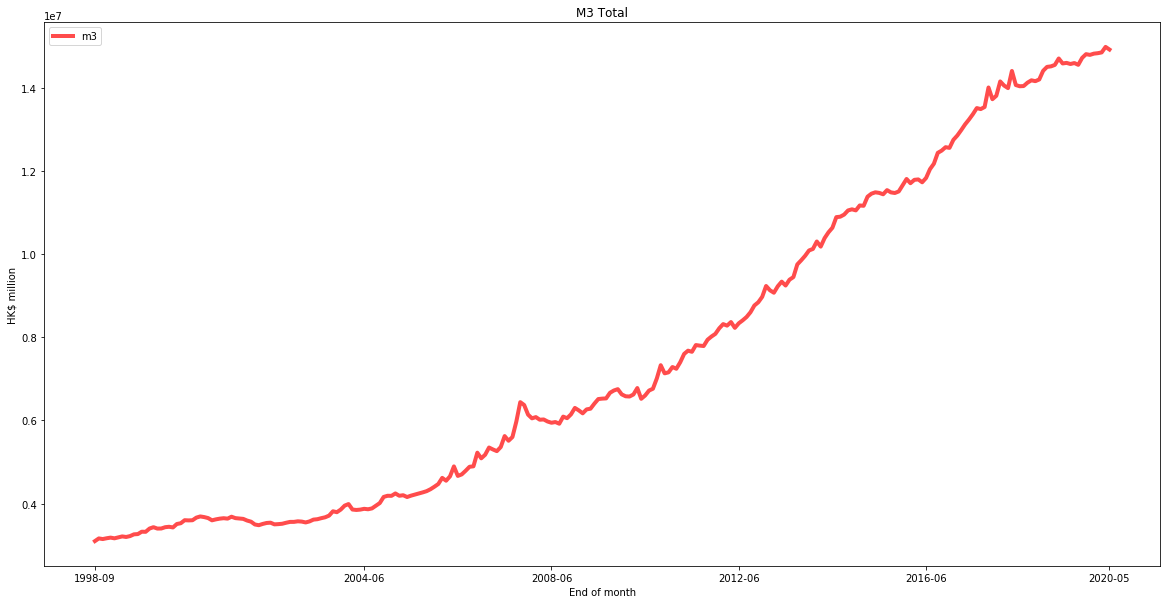

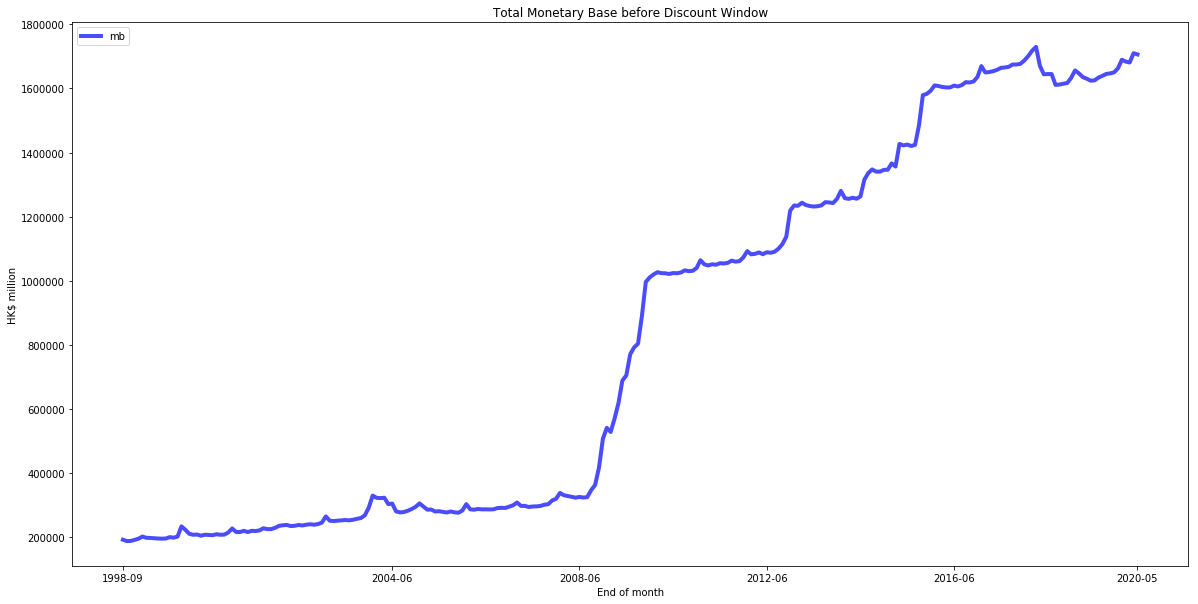

In [3]:
def get_MSA_from_HKMA():
    # Monetary Supply-Ddjusted
    url = 'https://api.hkma.gov.hk/public/market-data-and-statistics/monthly-statistical-bulletin/money/supply-adjusted?choose=end_of_month&from=1998-09&to=now&sortby=end_of_month&sortorder=asc'

    # retrieve data from hkma api, 100 entries per call, untill every data are retrieveed
    records = []
    offset = 0
    while True:
        with urllib.request.urlopen(url+"&offset="+str(offset), context=context) as req:
            data = json.loads(req.read().decode())
            records += data['result']['records']
        if data['result']['datasize'] <= 0:
            break
        else:
            offset += 100

    # now data retrieved from hkma are stored in 'records' in a chronological order
    return records


def MM():
    mbc_records = get_MBC_from_HKMA()
    msa_records = get_MSA_from_HKMA()

    syncLength = min(len(mbc_records), len(msa_records))
    mbc_records = mbc_records[:syncLength]  # mb_bf_disc_win_total
    msa_records = msa_records[:syncLength]  # m3_total

    formatted_X = []
    formatted_mm_Y = []
    formatted_m3_total_Y = []
    formatted_mb_total_Y = []

    for i in range(syncLength):
        mm = msa_records[i]['m3_total'] / mbc_records[i]['mb_bf_disc_win_total']
        end_of_month = msa_records[i]['end_of_month']
        
        if(not msa_records[i]['end_of_month'] == mbc_records[i]['end_of_month']):
            print("something wrong here, please check") # date sync check

        formatted_X += [end_of_month]
        formatted_mm_Y += [mm]
        formatted_m3_total_Y += [msa_records[i]['m3_total']]
        formatted_mb_total_Y += [mbc_records[i]['mb_bf_disc_win_total']]

    
    # Plot mm
    plt.plot(formatted_X, formatted_mm_Y, color='orange', linewidth=4, alpha=0.7, label="money multiplier")
    plt.title("1. Money Multiplier = M3 / MB (HKD)")
    plt.xlabel("End of month")
    plt.ylabel("HK$ million")
    plt.xticks([formatted_X[-1], '2016-06', '2012-06',
                '2008-06', '2004-06', '1998-09'])
    plt.legend(loc='upper left')
    plt.rcParams['figure.figsize'] = [20, 10]
    plt.show()

    # Plot m3
    plt.plot(formatted_X, formatted_m3_total_Y, color='red', linewidth=4, alpha=0.7, label="m3")
    plt.title("M3 Total")
    plt.xlabel("End of month")
    plt.ylabel("HK$ million")
    plt.xticks([formatted_X[-1], '2016-06', '2012-06',
                '2008-06', '2004-06', '1998-09'])
    plt.legend(loc='upper left')
    plt.rcParams['figure.figsize'] = [20, 10]
    plt.show()
    
    # Plot mb
    plt.plot(formatted_X, formatted_mb_total_Y, color='blue', linewidth=4, alpha=0.7, label="mb")
    plt.title("Total Monetary Base before Discount Window")
    plt.xlabel("End of month")
    plt.ylabel("HK$ million")
    plt.xticks([formatted_X[-1], '2016-06', '2012-06',
                '2008-06', '2004-06', '1998-09'])
    plt.legend(loc='upper left')
    plt.rcParams['figure.figsize'] = [20, 10]
    plt.show()

MM()